# This script contains the following contents:
## 1. Import libraries and data sets
## 2. Deriving variables using If-statements with user defined functions
## 3. Use Matplotlib to plot charts

### 1. Import Libraries and data sets

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import pickle
import os
import matplotlib.pyplot as plt 

In [2]:
path = r'C:\Users\ksmak\Desktop\CareerFoundary\Instacart Basket'

In [3]:
#Import pickle file using stacking command of os.path.join()

df_ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Working Data', 'ords_prods_merged.pkl'))

In [4]:
df_ords_prods_merged.shape

(32404859, 14)

In [5]:
# Create a subset

df = df_ords_prods_merged[:1000000]

In [6]:
df.shape

(1000000, 14)

### 2.1 Deriving variables using User Defined Function, "if, elif, and, else, return" statements

In [7]:
# Deriving variables "price_label"

def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High-range product'
  else: return 'Not enough data'

In [8]:
# Apply the function that search through the entire datafarme

df['price_range'] = df.apply(price_label, axis=1)

C:\Users\ksmak\AppData\Local\Temp\ipykernel_88712\93659844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [9]:
df['price_range'].value_counts(dropna = False)

price_range
Mid-range product    983807
Low-range product     16193
Name: count, dtype: int64

In [10]:
df['prices'].max()

13.7

### 2.2 Deriving variables using loc() function without if-else

In [11]:
# loc[] a particular column in the dataframe

df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

C:\Users\ksmak\AppData\Local\Temp\ipykernel_88712\1169838859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'


In [12]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [13]:
df.loc[df['prices'] < 5, 'price_range_loc'] = 'Low-range product'

In [14]:
df['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product    983807
Low-range product     11733
nan                    4460
Name: count, dtype: int64

#### nan = 4460 is not detected using "IF, ELSE" statements!

### 2.3 Repeat the loc() function on the entire dataframe

In [39]:
# create product price groupings

df_ords_prods_merged.loc[df_ords_prods_merged['prices'] > 15, 'price_range_loc'] = 'High-range (>$15)'
df_ords_prods_merged.loc[(df_ords_prods_merged['prices'] <= 15) & (df_ords_prods_merged['prices'] >= 9), 'price_range_loc'] = 'Mid-range (\$9-\$15)'
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] < 9, 'price_range_loc'] = 'Low-range (<$9)'

In [40]:
# Create new column "price_range_loc" in df_ords_prods_merged

price_range_count = df_ords_prods_merged['price_range_loc'].value_counts(dropna = False)

In [41]:
# Remove scientific notation

pd.set_option('display.float_format', lambda x: '%.2f' % x)

### 3.1 Use Matplotlib to plot charts

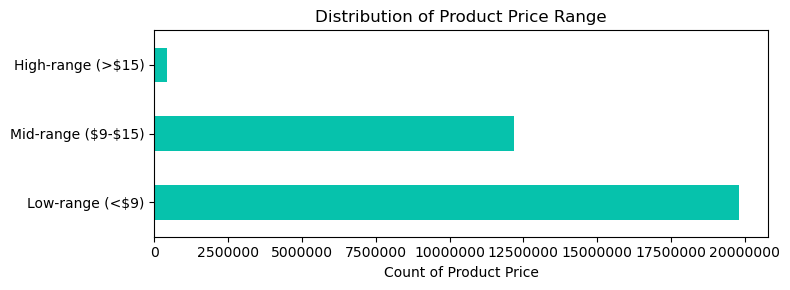

In [42]:
# Plot horizontal bar chart for product price range

# Set the size of the figure
plt.figure(figsize=(8, 3))  # Adjust width and height as needed

# Plot Horizontal Bar Chart for product price range
price_range_count_bar = price_range_count.plot.barh(
    title='Distribution of Product Price Range', xlabel='Count of Product Price', ylabel='Price Range', color='#06C2AC')

# Format x-axis tick labels without scientific notation
plt.ticklabel_format(style='plain', axis='x')

# Remove the y-axis label
plt.ylabel('') 

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top 10 departments with customer profile.png'))

# Show the plot
plt.show()

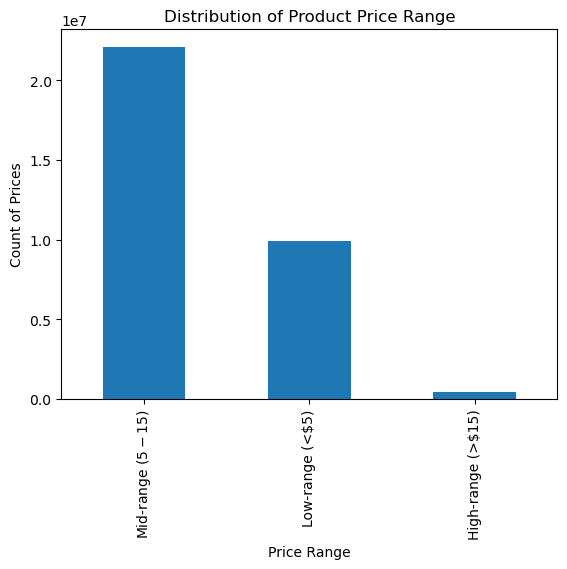

In [12]:
# Plot vertical bar chart for product price range

price_range_count.plot.bar()
plt.title ('Distribution of Product Price Range')
plt.xlabel ('Price Range')
plt.ylabel ('Count of Prices')

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'distribution of product price range.png'))

plt.show ()

In [4]:
# Count frequency of order

df_ords_prods_merged['order_day_of_week'].value_counts(dropna = False)

order_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [5]:
busiest_days_counts = df_ords_prods_merged['order_day_of_week'].value_counts(dropna = False)

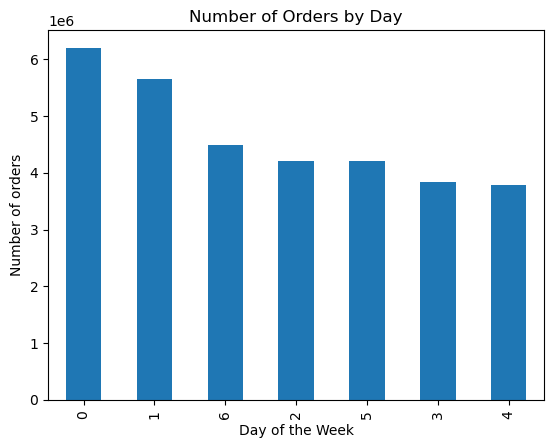

In [13]:
# Plot vertical bar chart for number of orders by day

busiest_days_counts.plot.bar()
plt.title ('Number of Orders by Day')
plt.xlabel ('Day of the Week')
plt.ylabel ('Number of orders')

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest days.png'))
plt.show ()

#### 0=Saturday is the busiest, and 4=Wednesday is the slowest day

In [44]:
# Use For-Loops to group days into 3 categories, and only searh at ONE column
# FASTER than user-defined function

result = []

for value in df_ords_prods_merged['order_day_of_week']:
  if value == 0:
    result.append('Busiest day')
  elif value == 4:
    result.append('Least busy')
  else:
    result.append('Regularly busy')

In [45]:
# Create new column "busiest_day"

df_ords_prods_merged['busiest_day'] = result

In [46]:
df_ords_prods_merged['busiest_day'].value_counts(dropna = False)

busiest_day
Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: count, dtype: int64

## Excercise Ex4.7

### Question 2: Create new column "busiest_days" for day_of_week = 0 and 1, and add day_of_week = 3 into Least Busy

In [ ]:
# Use For-Loops to group days into 3 categories, and only searh at ONE column
# FASTER than user-defined function

result1 = []

for value in df_ords_prods_merged['order_day_of_week']:
  if value == 0 or value == 1:
    result1.append('Busiest days')
  elif value == 4 or value == 3:
    result1.append('Least busy')
  else:
    result1.append('Regularly busy')

In [57]:
# Create new column "busiest_days"

df_ords_prods_merged['busiest_days'] = result1

In [58]:
df_ords_prods_merged['busiest_days'].value_counts(dropna = False)

busiest_days
Regularly busy    12916111
Busiest days      11864412
Least busy         7624336
Name: count, dtype: int64

In [ ]:
df_ords_prods_merged.head()

In [61]:
df_ords_prods_merged.loc[df_ords_prods_merged['order_day_of_week'].isin([0,1,3,4,5])]

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_day_of_week,order_time_24h,days_since_prior_order,product_name,aisle_id,department_id,prices,True,price_range_loc,busiest_day,busiest_days
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy
1,26,33120,5,0,153404,2,0,16,7.0,Organic Egg Whites,86,16,11.3,both,Mid-range product,Busiest day,Busiest days
4,390,33120,28,1,166654,48,0,12,9.0,Organic Egg Whites,86,16,11.3,both,Mid-range product,Busiest day,Busiest days
7,608,33120,5,1,91030,11,3,21,12.0,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Least busy
8,623,33120,1,1,37804,63,3,12,3.0,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Least busy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,3265099,43492,3,0,111311,2,3,10,5.0,Gourmet Burger Seasoning,104,13,4.8,both,Low-range product,Regularly busy,Least busy
32404855,3361945,43492,19,0,142932,25,3,10,5.0,Gourmet Burger Seasoning,104,13,4.8,both,Low-range product,Regularly busy,Least busy
32404856,3267201,33097,2,0,183867,19,3,18,3.0,Piquillo & Jalapeno Bruschetta,81,15,9.4,both,nan,Regularly busy,Least busy
32404857,3393151,38977,32,0,79056,1,4,13,NaN,Original Jerky,100,21,1.5,both,Low-range product,Least busy,Least busy


#### The frequencies for the 3 categories "Busiest days", "Least busy" and "Regularly busy" change accordingly from 
"Regularly busy"    22416875 to 12916111,
"Busiest day"        6204182 to 11864412, and 
"Least busy"         3783802 to 7624336

### Question 4: Create a new column "busiest_period_of_day" and group busiest hours of the day into "Most orders", "Average orders", and "Fewest orders"

In [62]:
df_ords_prods_merged['order_time_24h'].value_counts(dropna = False)

order_time_24h
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

In [16]:
busiest_hours_counts = df_ords_prods_merged['order_time_24h'].value_counts(dropna = False)

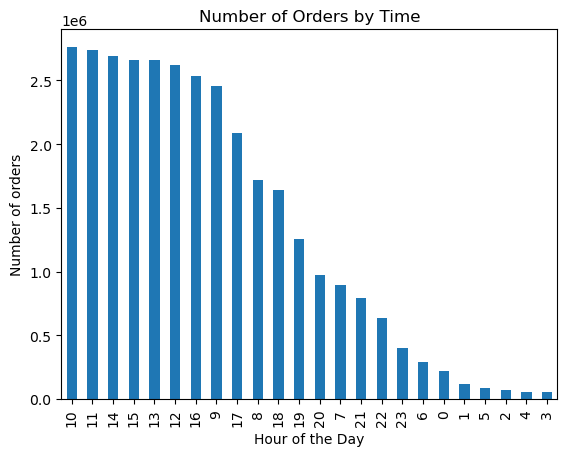

In [17]:
busiest_hours_counts.plot.bar()
plt.title ('Number of Orders by Time')
plt.xlabel ('Hour of the Day')
plt.ylabel ('Number of orders')

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest hours.png'))
plt.show ()

#### The busiest hours of the day are from 9 to 16 hours

In [66]:
# Use For-Loops to group days into 3 categories, and only searh at ONE column
# FASTER than user-defined function

result2 = []

for value in df_ords_prods_merged['order_time_24h']:
  if value in range (9,17):
    result2.append('Most oders')
  elif value in range (2,5):
    result2.append('Fewest orders')
  else:
    result2.append('Average orders')

In [67]:
# Create new column "busiest_period_of_day"

df_ords_prods_merged['busiest_period_of_day'] = result2

#### The frequency of the new column "busiest_period_of_day"

In [68]:
df_ords_prods_merged['busiest_period_of_day'].value_counts(dropna = False)

busiest_period_of_day
Most oders        21118071
Average orders    11112890
Fewest orders       173898
Name: count, dtype: int64

In [ ]:
df_ords_prods_merged.head()

In [ ]:
df_ords_prods_merged.tail()

In [75]:
df_ords_prods_merged.shape

(32404859, 18)

#### Export dataframe as a pickle file

In [74]:
df_ords_prods_merged.to_pickle(os.path.join(path, '02 Data','Working Data', 'ords_prods_merged_ex4_7.pkl'))